In [26]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape)  # Should print (70000, 784)

(70000, 784)


In [5]:
y = y.astype(np.int8)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),        # Single hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=30,                      # For faster training during demo (You can increase for better accuracy)
    random_state=42
)

In [9]:
mlp_model.fit(X_train, y_train)

D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,30
,shuffle,True
,random_state,42


In [10]:
y_pred = mlp_model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Neural Network (MLP) Test Accuracy on MNIST: {accuracy * 100:.2f}%")


✅ Neural Network (MLP) Test Accuracy on MNIST: 97.16%


In [15]:
print(f"\n✅ Neural Network (MLP) Test Accuracy on MNIST: {accuracy * 100:.2f}%")


✅ Neural Network (MLP) Test Accuracy on MNIST: 97.16%


In [16]:
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.94      0.96      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [17]:
print("\n✅ Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


✅ Confusion Matrix:

[[1321    1    3    0    1    0    9    4    4    0]
 [   0 1585    5    0    1    0    0    5    2    2]
 [   4    7 1332    7    5    2    3    8    9    3]
 [   0    2   13 1385    0   11    1    9    4    8]
 [   1    1    2    0 1263    1    3    4    1   19]
 [   1    2    0   18    3 1226   10    2    9    2]
 [   3    2    1    0    5    7 1374    0    4    0]
 [   2    3   12    4    2    2    0 1462    1   15]
 [   2    9   12   14    3    9    9    5 1282   12]
 [   5    5    2    8    7    2    0   12    6 1373]]


In [19]:
sample_index = 0
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

In [20]:
predicted_label = mlp_model.predict([sample_image])[0]

In [23]:
sample_image_reshaped = sample_image.reshape(1, -1)
original_pixel_values = scaler.inverse_transform(sample_image_reshaped).reshape(28, 28)

In [24]:
predicted_label = mlp_model.predict([sample_image])[0]

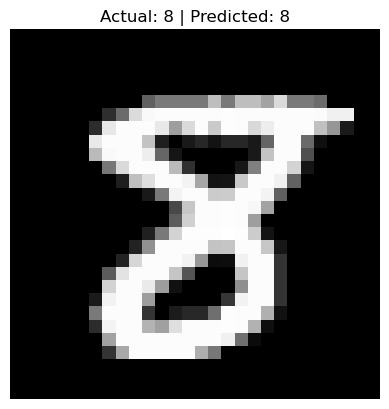

In [25]:
plt.imshow(original_pixel_values, cmap='gray')
plt.title(f"Actual: {sample_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [34]:
img = Image.open('three.png').convert('L')

In [35]:
img = img.resize((28, 28))

In [36]:
img_array = np.array(img).flatten()

In [37]:
img_array = 255 - img_array

In [38]:
img_scaled = scaler.transform([img_array])

In [39]:
predicted_label = mlp_model.predict(img_scaled)[0]
print(f"\n✅ Predicted Digit from Your Image: {predicted_label}")


✅ Predicted Digit from Your Image: 3


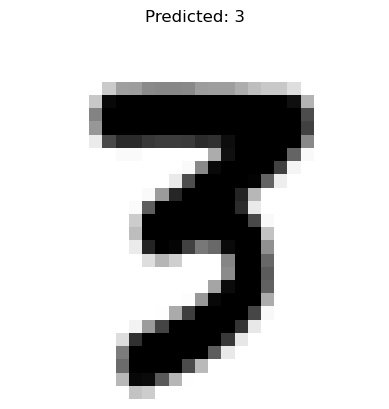

In [40]:
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()